<a href="https://colab.research.google.com/github/nikhil-xyz/Natural_Language_Processing/blob/main/Spam_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!git clone https://github.com/nikhil-xyz/Natural_Language_Processing.git

fatal: destination path 'Natural_Language_Processing' already exists and is not an empty directory.


In [14]:
import pandas as pd
messages = pd.read_csv('/content/Natural_Language_Processing/data/Spam_Classifier/SPAM.csv')

In [15]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
corpus = []
for i in range(len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['Message'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()

y = pd.get_dummies(messages['Category'])
y = y.iloc[:,1].values

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [19]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, Y_train)

In [20]:
Y_pred = spam_detect_model.predict(X_test)

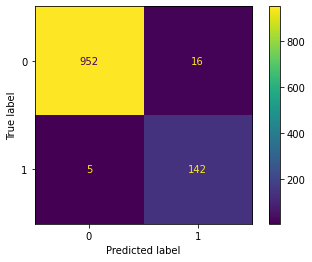

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
c_metrix = confusion_matrix(Y_test, Y_pred)
display = ConfusionMatrixDisplay(c_metrix)
display.plot()
plt.show()

In [22]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)
print(accuracy)

0.9811659192825112
